In [ ]:
# load csv

import torch
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

path_ = 'fmnist_2level_ctx/'
name_ = 'run-tb_fashion_c10_mnist_2level_ctx10_3_1-tag-Context_functools.partial__function_sample_fashion_mnist_img_fnc_at_0x20008d49e0e0___'

data_all = []
for label in range(10):
    data = []
    for dim in range(3):
        ver = str(label)+'__'+str(dim)
        filename = path_ + name_+ ver + '.csv'
        
        csv = pd.read_csv(filename)
        tensor = torch.tensor(csv.values)
#         data.append(tensor[:,-1])
        data.append(tensor[:763,-1]) # somehow the data does not have equal epoch number. (some are 764 some are 763)
    
    data_all.append(torch.stack(data))
    
data_all = torch.stack(data_all)
time = tensor[:763,1].numpy()


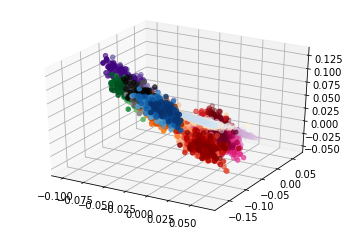

In [3]:
# Couldn't figure out how to make interactive plots - anyone? I thought there was a matplotlib magic that worked. 

# %matplotlib widget
# %matplotlib inline
# %matplotlib notebook
# %matplotlib qt

# plt.ion()
fig = plt.figure()
ax = plt.axes(projection='3d')

cmaps = [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

for label in range(10): 
    xdata = data_all[label,0,:].squeeze().numpy()
    ydata = data_all[label,1,:].squeeze().numpy()
    zdata = data_all[label,2,:].squeeze().numpy()
    
    ax.scatter3D(xdata, ydata, zdata, c=time, cmap=cmaps[label]);
    
plt.show() 